In [5]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline

In [7]:
x = np.linspace(4, 23, 43)
x

array([  4.        ,   4.45238095,   4.9047619 ,   5.35714286,
         5.80952381,   6.26190476,   6.71428571,   7.16666667,
         7.61904762,   8.07142857,   8.52380952,   8.97619048,
         9.42857143,   9.88095238,  10.33333333,  10.78571429,
        11.23809524,  11.69047619,  12.14285714,  12.5952381 ,
        13.04761905,  13.5       ,  13.95238095,  14.4047619 ,
        14.85714286,  15.30952381,  15.76190476,  16.21428571,
        16.66666667,  17.11904762,  17.57142857,  18.02380952,
        18.47619048,  18.92857143,  19.38095238,  19.83333333,
        20.28571429,  20.73809524,  21.19047619,  21.64285714,
        22.0952381 ,  22.54761905,  23.        ])

In [8]:
print(x[5])

6.2619047619


In [13]:
ones_array = np.ones( (5,17) ) 
zeros_array = np.zeros( ones_array.shape ) 
print(zeros_array.shape[0])
print(zeros_array.shape[1])

5
17


In [29]:
p = 7
r = np.array([11.2, 4.7, 6.6])
np.sin(p/r)**3

array([ 0.20030151,  0.99009101,  0.66454238])

In [25]:
import math
import numpy as np
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [41]:
# model parameters:
m_s = 50     # weight in kg
g = 9.8      # gravity in m s^{-2}
rho = 1.091  # average air density in kg m^{-3}
r = 0.5      # in m
A = math.pi*r**2   # maximum cross sectional area in m^{2}
v_e = 325       # exhaust speed in m s^{-1}
C_d = 0.15      # drag coefficient
m_p0 = 100      # weight in kg

### set initial conditions ###
v0 = 0     # initial velocity
h0 = 0  # initial altitude

In [42]:
T = 50                          # final time
dt = 0.1                           # time increment
N = int(T/dt) + 1                  # number of time-steps

In [49]:
def f(u):
    """Returns the right-hand side of the phugoid system of equations.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    
    h = u[0]
    v = u[1]
    return np.array([v, -g+(m_pd*v_e)/(m_s+m_p)-rho*v*np.abs(v)*A*C_d/2*(m_s+m_p)])


In [50]:
def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equations.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

In [51]:
u = np.empty((N, 2))

u[0] = np.array([h0, v0])

for n in range(N-1):
    if n*dt< 5:
        m_pd = 20
    else:
        m_pd = 0
    m_p = m_p0 - m_pd*n*dt 
    u[n+1] = euler_step(u[n], f, dt)

/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in double_scalars
/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in add
/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in absolute


In [60]:
x = np.linspace(0, N*dt, N)
y = h

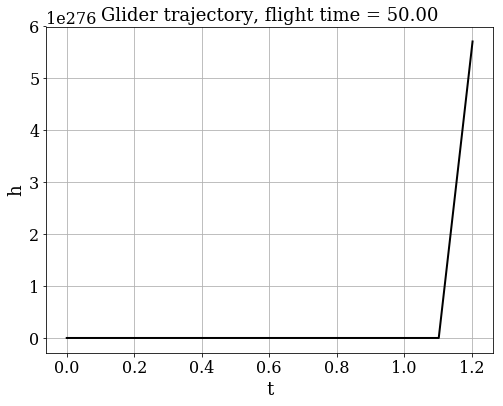

In [62]:
# visualization of the path
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r't', fontsize=18)
pyplot.ylabel(r'h', fontsize=18)
pyplot.title('Glider trajectory, flight time = %.2f' % T, fontsize=18)
pyplot.plot(x,y, 'k-', lw=2);